In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


# **Data Visualization**
**Ajenda:**
1.Matplotlib
2.Pandas
3.Seaborn


1. **Using Matplotlib**

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data.
We will use the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset and [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews) dataset.

In [3]:
iris =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal_length','sepal_width', 'petal_length','petal_width','class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
wine_reviews= pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")
wine_reviews.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


**Scatter plot**

.subplots() creatsa a figure and a grid of subplots

Text(0, 0.5, 'Sepal_width')

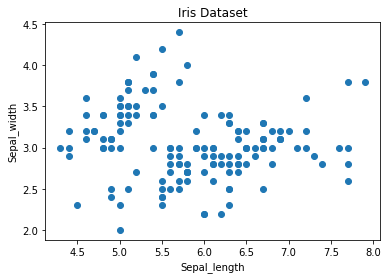

In [5]:
#create a figure and axis subplots
fig, ax = plt.subplots()

ax.scatter(iris['sepal_length'], iris['sepal_width'])

ax.set_title('Iris Dataset')
ax.set_xlabel('Sepal_length')
ax.set_ylabel('Sepal_width')


Text(0, 0.5, 'sepal_width')

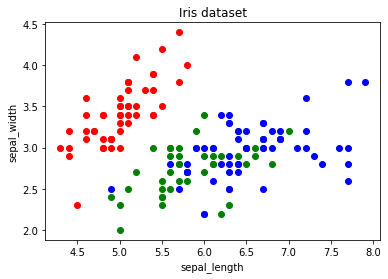

In [6]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax =plt.subplots()

for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i], color=colors[iris['class'][i]])
ax.set_title('Iris dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

    

**Line Chart**


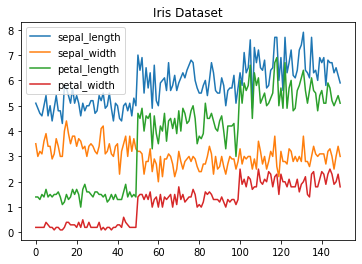

In [7]:
columns = iris.columns.drop(['class'])

x_data = range(0, iris.shape[0])

fig, ax = plt.subplots()

for column in columns:
    ax.plot(x_data,iris[column], label=column)
ax.set_title('Iris Dataset')
ax.legend()

**Histogram**

Text(0, 0.5, 'Frequency')

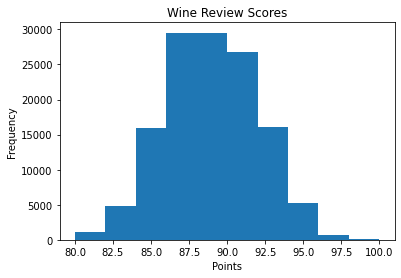

In [8]:
fig, ax =plt.subplots()

ax.hist(wine_reviews['points'])

ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

Bar Chart

Text(0, 0.5, 'Frequency')

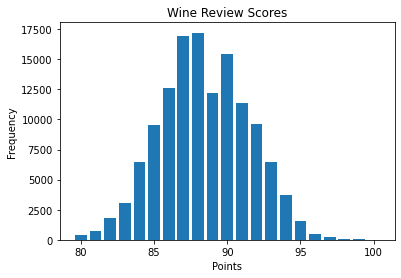

In [9]:
fig, ax = plt.subplots()
#count the occurence of each class
data = wine_reviews['points'].value_counts()
# get x and y data
points = data.index
frequency = data.values
#create bar chart
ax.bar(points, frequency)

ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

2. **Pandas Visualization**

<AxesSubplot:title={'center':'Iris Dataset'}, xlabel='sepal_length', ylabel='sepal_width'>

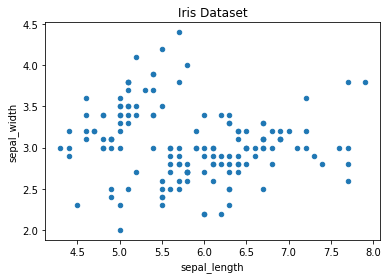

In [10]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

**Line Chart**

In pandas we don't need to loop through each column because it automatically polt all numeric columns

<AxesSubplot:title={'center':'Iris Dataset'}>

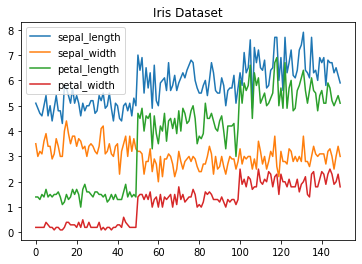

In [11]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

Histogram

<AxesSubplot:ylabel='Frequency'>

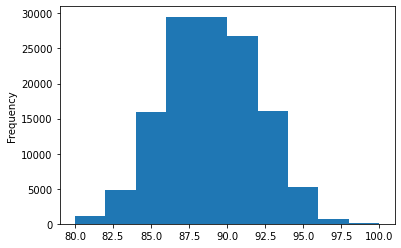

In [12]:
wine_reviews['points'].plot.hist()

Multiple Histograms

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

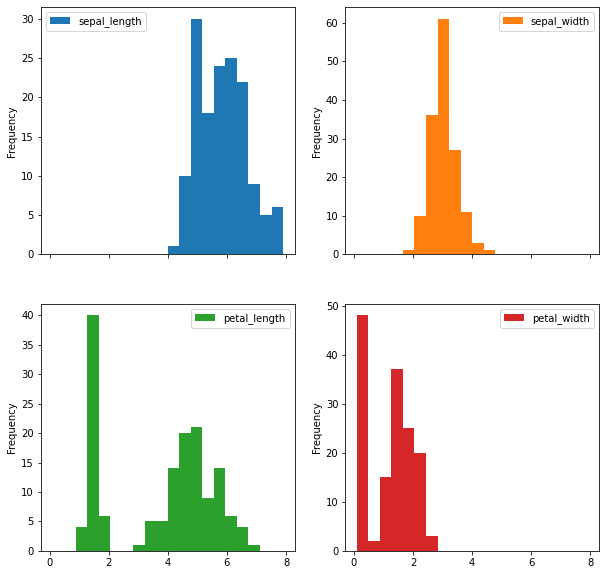

In [13]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10,10), bins=20)

Bar chart

<AxesSubplot:>

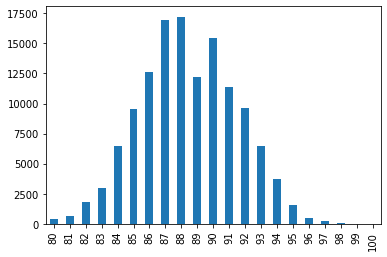

In [14]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

Horizontal Bar chart

plot.barh()

<AxesSubplot:>

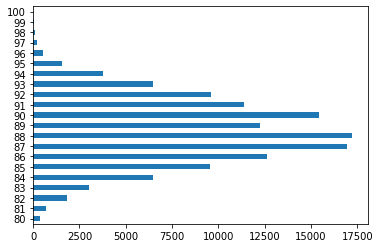

In [15]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

Plot accordint to the number of occurence

<AxesSubplot:xlabel='country'>

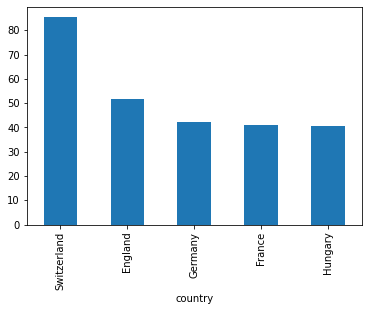

In [16]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

3. **Seaborn**

Scatter plot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

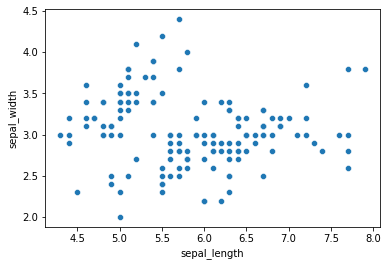

In [17]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

using the hue argument

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

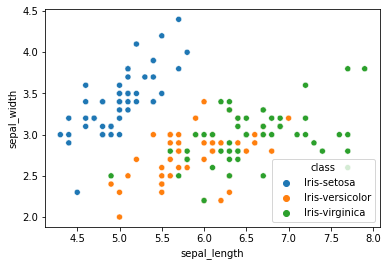

In [18]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

**Line Chart**

<AxesSubplot:>

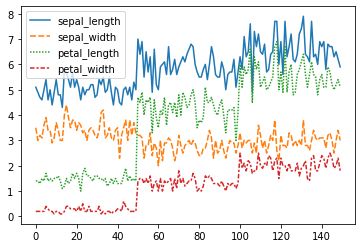

In [19]:
sns.lineplot(data=iris.drop(['class'], axis=1))

**Histogram**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points'>

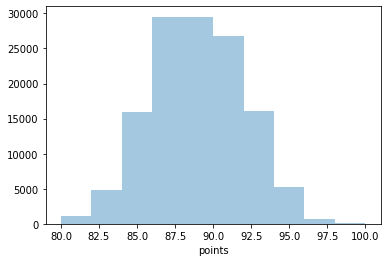

In [20]:
sns.distplot(wine_reviews['points'], bins=10, kde=False)

<AxesSubplot:xlabel='points', ylabel='Density'>

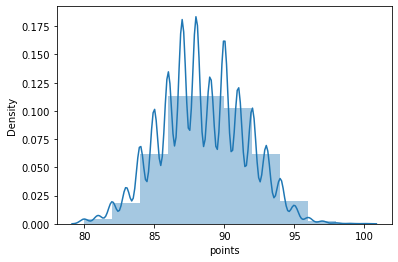

In [21]:
sns.distplot(wine_reviews['points'], bins=10, kde=True)

Bar chart

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='points', ylabel='count'>

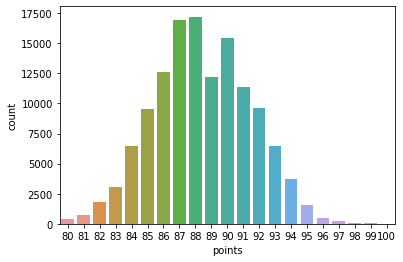

In [22]:
sns.countplot(wine_reviews['points'])